In [1]:
%cd /Users/user/Desktop/IWF-DNN/data2DComplex
%pwd
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import scipy.io as sio
import time
from sklearn.cross_validation import train_test_split
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

/Users/user/Desktop/IWF-DNN/data2DComplex


/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
DateLocation='MIMO50000_3.mat'
Data = sio.loadmat(DateLocation)#load data
Xdata=Data['X']
Ydata=Data['Y']
Xdata = np.transpose(Xdata)
Ydata = np.transpose(Ydata)
X = np.column_stack((np.real(Xdata), np.imag(Xdata)))
Y = np.column_stack((np.real(Ydata), np.imag(Ydata)))
x_train, x_val ,y_train, y_val= train_test_split(X, Y, test_size=0.1)
DateLocation2='MIMO5000_3.mat'
DataTest10000 = sio.loadmat(DateLocation2)#load data
Xtest=DataTest10000['X']
Xtest = np.transpose(Xtest)
Ytest=DataTest10000['Y']
Ytest = np.transpose(Ytest)
Xtest = np.column_stack((np.real(Xtest), np.imag(Xtest)))
Ytest = np.column_stack((np.real(Ytest), np.imag(Ytest)))

# Different layers From 2 hidden layers to 5 hidden layers

In [3]:
def plot_whole(dict_data):
    fig_1 = plt.figure(figsize=(12,4))
    ax_1 = fig_1.add_subplot(1,2,1)
    ax_2 = fig_1.add_subplot(1,2,2)
    k =int(0)
    for data in dict_data.values():
        ax_1.plot(np.arange(0,len(data['loss'])),data['loss'], label=list(dict_data.keys())[k])
        ax_2.plot(np.arange(0,len(data['val_loss'])),data['val_loss'], label=list(dict_data.keys())[k])
        k += 1
    ax_1.legend(loc=0)
    
    ax_2.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('error(train)')
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('error(valid)')
    fig_1.savefig('err.pdf')
    return fig_1, ax_1, ax_2
dictData={}

In [5]:
# example of training a final regression model

from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model3layers = Sequential()
# activation=keras.layers.ReLU()
model3layers.add(Dense(480, input_dim=24, activation='relu'))
model3layers.add(Dense(240, activation='relu'))
model3layers.add(Dense(120, activation='relu'))
model3layers.add(Dense(24, activation='linear'))
model3layers.summary()
model3layers.compile(loss='mse', optimizer='adam')
hist=model3layers.fit(x_train, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-240-120']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 480)               12000     
_________________________________________________________________
dense_2 (Dense)              (None, 240)               115440    
_________________________________________________________________
dense_3 (Dense)              (None, 120)               28920     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                2904      
Total params: 159,264
Trainable params: 159,264
Non-trainable params: 0
_________________________________________________________________
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 6s 129us/step - loss: 0.7991 - val_loss: 0.5542
Epoch 2/100
45000/45000 [==============================] - 6s 126us/step - loss: 0.4860 - val_loss: 0.4439
Epoch

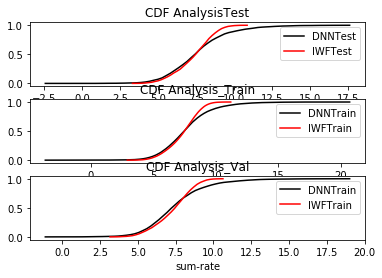

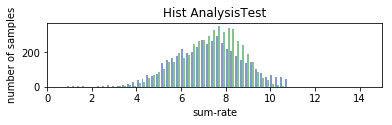

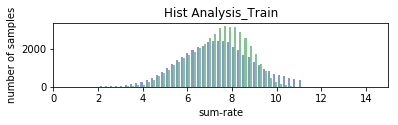

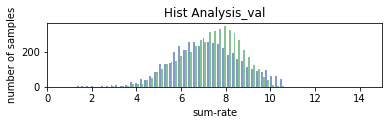

test:
Sum-rate: IWF: 7.326, DNN: 7.560
Ratio: DNN: 103.188%

Train:
Sum-rate: IWF: 7.355, DNN: 7.617
Ratio: DNN: 103.567%

Val:
Sum-rate: IWF: 7.319, DNN: 7.467
Ratio: DNN: 102.027%



0

In [13]:

trainPred=model3layers.predict(x_train)

# encoder_x_val=encoder.predict(x_val_standard)
valPred=model3layers.predict(x_val)

# encoder_x_test=encoder.predict(Xtest_standard)
ypred=model3layers.predict(Xtest)
D=12
M=2
N=2
K=3
# test
xtest=DABtoComplex(Xtest,D)
ytest=DABtoComplex(Ytest,D)
ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)

# # test
nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 45000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 45000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 5000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 5000)

plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
plt.subplot(313)
plt.title('CDF Analysis_Val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(311)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
print('test:')
performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 45000)
print('Val:')
performance(IWFSRVal, nnSRVal, 5000)

In [14]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model2layers = Sequential()
# activation=keras.layers.ReLU()
model2layers.add(Dense(480, input_dim=24, activation='relu'))
model2layers.add(Dense(240, activation='relu'))
model2layers.add(Dense(24, activation='linear'))
model2layers.summary()
model2layers.compile(loss='mse', optimizer='adam')
hist=model2layers.fit(x_train, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencode')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-240']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 480)               12000     
_________________________________________________________________
dense_9 (Dense)              (None, 240)               115440    
_________________________________________________________________
dense_10 (Dense)             (None, 24)                5784      
Total params: 133,224
Trainable params: 133,224
Non-trainable params: 0
_________________________________________________________________
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 5s 107us/step - loss: 0.7891 - val_loss: 0.5893
Epoch 2/100
45000/45000 [==============================] - 6s 143us/step - loss: 0.5424 - val_loss: 0.5160
Epoch 3/100
45000/45000 [==============================] - 7s 153us/step - loss: 0.4824 - val_loss: 0.4808
Epoch 4/100
45000/45000 [=====

In [16]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model4layers = Sequential()
# activation=keras.layers.ReLU()
model4layers.add(Dense(480, input_dim=24, activation='relu'))
model4layers.add(Dense(240, activation='relu'))
model4layers.add(Dense(120, activation='relu'))
model4layers.add(Dense(60, activation='relu'))
model4layers.add(Dense(24, activation='linear'))
model4layers.summary()
model4layers.compile(loss='mse', optimizer='adam')
hist=model4layers.fit(x_train, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencod')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-240-120-60']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 480)               12000     
_________________________________________________________________
dense_12 (Dense)             (None, 240)               115440    
_________________________________________________________________
dense_13 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_14 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_15 (Dense)             (None, 24)                1464      
Total params: 165,084
Trainable params: 165,084
Non-trainable params: 0
_________________________________________________________________
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 6s 126us/step - loss: 0.7946

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a29bc58d0>)

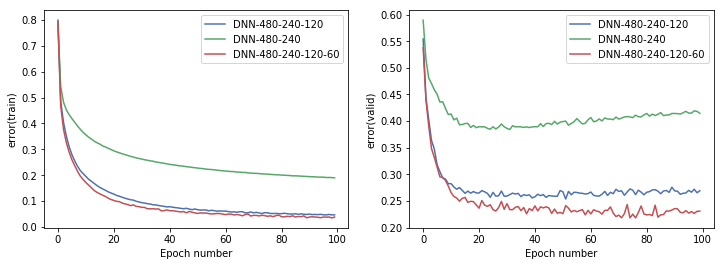

In [17]:
plot_whole(dictData)

In [18]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model5layers = Sequential()
# activation=keras.layers.ReLU()

model5layers.add(Dense(240, input_dim=24, activation='relu'))
model5layers.add(Dense(480, activation='relu'))
model5layers.add(Dense(240, activation='relu'))
model5layers.add(Dense(120, activation='relu'))
model5layers.add(Dense(60, activation='relu'))
model5layers.add(Dense(24, activation='linear'))
model5layers.summary()
model5layers.compile(loss='mse', optimizer='adam')
hist=model5layers.fit(x_train, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoenco')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-240-480-240-120-60']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 240)               6000      
_________________________________________________________________
dense_17 (Dense)             (None, 480)               115680    
_________________________________________________________________
dense_18 (Dense)             (None, 240)               115440    
_________________________________________________________________
dense_19 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_20 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_21 (Dense)             (None, 24)                1464      
Total params: 274,764
Trainable params: 274,764
Non-trainable params: 0
_________________________________________________________________
Trai

45000/45000 [==============================] - 7s 164us/step - loss: 0.0354 - val_loss: 0.2709
Epoch 67/100
45000/45000 [==============================] - 7s 162us/step - loss: 0.0383 - val_loss: 0.2715
Epoch 68/100
45000/45000 [==============================] - 7s 161us/step - loss: 0.0355 - val_loss: 0.2659
Epoch 69/100
45000/45000 [==============================] - 7s 165us/step - loss: 0.0393 - val_loss: 0.2764
Epoch 70/100
45000/45000 [==============================] - 7s 164us/step - loss: 0.0382 - val_loss: 0.2609
Epoch 71/100
45000/45000 [==============================] - 7s 163us/step - loss: 0.0328 - val_loss: 0.2578
Epoch 72/100
45000/45000 [==============================] - 7s 165us/step - loss: 0.0353 - val_loss: 0.2816
Epoch 73/100
45000/45000 [==============================] - 7s 165us/step - loss: 0.0390 - val_loss: 0.2624
Epoch 74/100
45000/45000 [==============================] - 7s 165us/step - loss: 0.0344 - val_loss: 0.2631
Epoch 75/100
45000/45000 [===============

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2aba48d0>)

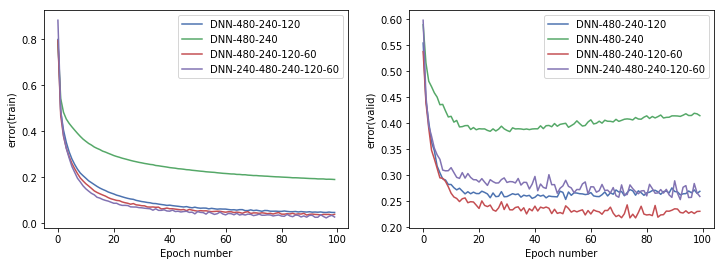

In [19]:
plot_whole(dictData)

In [20]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model5layers2 = Sequential()
# activation=keras.layers.ReLU()

model5layers2.add(Dense(480, input_dim=24, activation='relu'))
model5layers2.add(Dense(360, activation='relu'))
model5layers2.add(Dense(240, activation='relu'))
model5layers2.add(Dense(120, activation='relu'))
model5layers2.add(Dense(60, activation='relu'))
model5layers2.add(Dense(24, activation='linear'))
model5layers2.summary()
model5layers2.compile(loss='mse', optimizer='adam')
hist=model5layers2.fit(x_train, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoenco')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-360-240-120-60']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 480)               12000     
_________________________________________________________________
dense_23 (Dense)             (None, 360)               173160    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_26 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_27 (Dense)             (None, 24)                1464      
Total params: 309,444
Trainable params: 309,444
Non-trainable params: 0
_________________________________________________________________
Trai

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2adc3240>)

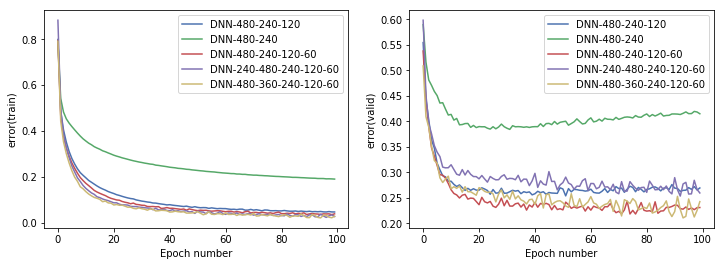

In [21]:
plot_whole(dictData)

In [22]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model5layers3 = Sequential()
# activation=keras.layers.ReLU()

model5layers3.add(Dense(480, input_dim=24, activation='relu'))
model5layers3.add(Dense(240, activation='relu'))
model5layers3.add(Dense(120, activation='relu'))
model5layers3.add(Dense(60, activation='relu'))
model5layers3.add(Dense(30, activation='relu'))
model5layers3.add(Dense(24, activation='linear'))
model5layers3.summary()

adam=keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
model5layers3.compile(loss='mse', optimizer=adam)
hist=model5layers3.fit(x_train, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoenc')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-240-120-60-30']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 480)               12000     
_________________________________________________________________
dense_29 (Dense)             (None, 240)               115440    
_________________________________________________________________
dense_30 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_31 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_32 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_33 (Dense)             (None, 24)                744       
Total params: 166,194
Trainable params: 166,194
Non-trainable params: 0
_________________________________________________________________
Trai

45000/45000 [==============================] - 6s 133us/step - loss: 0.0492 - val_loss: 0.2356
Epoch 67/100
45000/45000 [==============================] - 6s 129us/step - loss: 0.0533 - val_loss: 0.2337
Epoch 68/100
45000/45000 [==============================] - 6s 131us/step - loss: 0.0500 - val_loss: 0.2522
Epoch 69/100
45000/45000 [==============================] - 6s 130us/step - loss: 0.0484 - val_loss: 0.2311
Epoch 70/100
45000/45000 [==============================] - 6s 131us/step - loss: 0.0476 - val_loss: 0.2259
Epoch 71/100
45000/45000 [==============================] - 6s 131us/step - loss: 0.0485 - val_loss: 0.2357
Epoch 72/100
45000/45000 [==============================] - 6s 132us/step - loss: 0.0503 - val_loss: 0.2332
Epoch 73/100
45000/45000 [==============================] - 6s 134us/step - loss: 0.0488 - val_loss: 0.2210
Epoch 74/100
45000/45000 [==============================] - 6s 133us/step - loss: 0.0471 - val_loss: 0.2242
Epoch 75/100
45000/45000 [===============

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2bd53f60>)

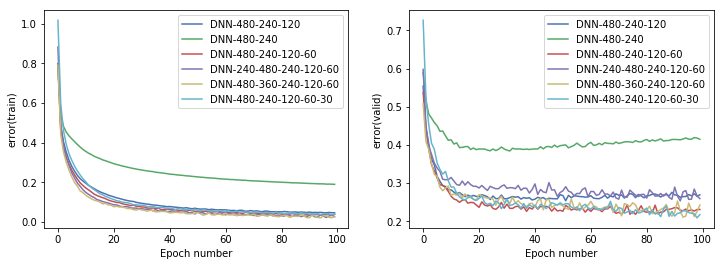

In [23]:
plot_whole(dictData)

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2c226a20>)

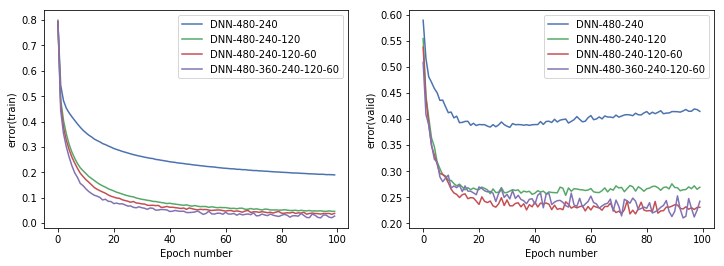

In [25]:
dictData2={}
dictData2['DNN-480-240']=dictData['DNN-480-240']
dictData2['DNN-480-240-120']=dictData['DNN-480-240-120']
dictData2['DNN-480-240-120-60']=dictData['DNN-480-240-120-60']
dictData2['DNN-480-360-240-120-60']=dictData['DNN-480-360-240-120-60']
plot_whole(dictData2)

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b9fcda0>)

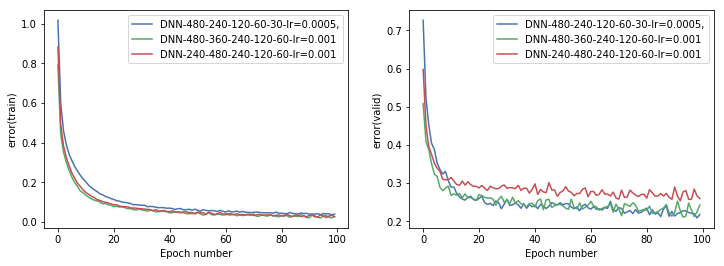

In [27]:
# different 5 layers
dictData3={}
dictData3['DNN-480-240-120-60-30-lr=0.0005,']=dictData['DNN-480-240-120-60-30']
dictData3['DNN-480-360-240-120-60-lr=0.001']=dictData['DNN-480-360-240-120-60']
dictData3['DNN-240-480-240-120-60-lr=0.001']=dictData['DNN-240-480-240-120-60']
plot_whole(dictData3)

In [45]:
dictData.keys()

dict_keys(['DNN-480-240-120', 'DNN-480-240', 'DNN-480-240-120-60', 'DNN-240-480-240-120-60', 'DNN-480-360-240-120-60', 'DNN-480-240-120-60-30'])

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2e041978>)

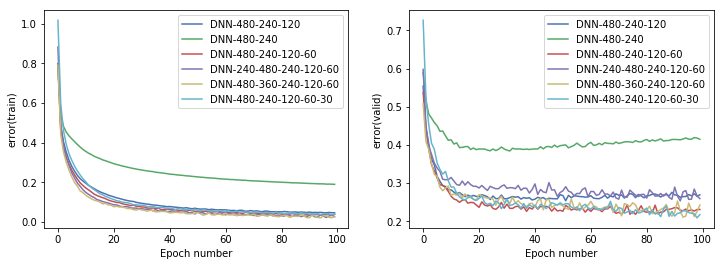

In [91]:
np.savez( "IWF_0731Results.npz", data=dictData )
d = np.load( "IWF_0731Results.npz" )
for sturctuers in sorted( d.items() ):
    val = sturctuers[1][()]
plot_whole(val)

In [2]:
model.save

NameError: name 'model' is not defined

In [85]:
sturctuers

[('data',
  array({'DNN-480-240-120': {'val_loss': [0.5541672182083129, 0.443914866745472, 0.40258808463811874, 0.3634426999092102, 0.3474165734648704, 0.31778897702693937, 0.3049004265666008, 0.29310020819306376, 0.2909484849870205, 0.2824036671221256, 0.2823568171262741, 0.27619178473949435, 0.27199922159314155, 0.27513272985816, 0.26978619277477267, 0.2643388351798058, 0.26841535925865173, 0.2645704236626625, 0.2676390305161476, 0.26496407479047773, 0.26484141886234286, 0.26943444699048996, 0.26711018979549406, 0.26418422654271123, 0.25683851912617683, 0.2660705615580082, 0.2589809487760067, 0.25966424390673637, 0.2686474692821503, 0.2587592574954033, 0.2591445006430149, 0.26185463696718214, 0.26462921634316444, 0.2629509538412094, 0.2641711363196373, 0.25798202872276305, 0.2618059174716473, 0.26022659093141554, 0.26147806450724603, 0.25564812541008, 0.2578444930911064, 0.2626064808666706, 0.25996805816888807, 0.2617783312499523, 0.2566860395669937, 0.2602632364630699, 0.25923991277

In [80]:
for sturctuers in sorted( d.items() ):
    print  (type(sturctuers[1]),)  
#     for  val in sturctuers[1]:
    val = sturctuers[1][()]
    print  (type(val), val)  # note d.TIME is a 0-d array

<class 'numpy.ndarray'>
<class 'dict'> {'DNN-480-240-120': {'val_loss': [0.5541672182083129, 0.443914866745472, 0.40258808463811874, 0.3634426999092102, 0.3474165734648704, 0.31778897702693937, 0.3049004265666008, 0.29310020819306376, 0.2909484849870205, 0.2824036671221256, 0.2823568171262741, 0.27619178473949435, 0.27199922159314155, 0.27513272985816, 0.26978619277477267, 0.2643388351798058, 0.26841535925865173, 0.2645704236626625, 0.2676390305161476, 0.26496407479047773, 0.26484141886234286, 0.26943444699048996, 0.26711018979549406, 0.26418422654271123, 0.25683851912617683, 0.2660705615580082, 0.2589809487760067, 0.25966424390673637, 0.2686474692821503, 0.2587592574954033, 0.2591445006430149, 0.26185463696718214, 0.26462921634316444, 0.2629509538412094, 0.2641711363196373, 0.25798202872276305, 0.2618059174716473, 0.26022659093141554, 0.26147806450724603, 0.25564812541008, 0.2578444930911064, 0.2626064808666706, 0.25996805816888807, 0.2617783312499523, 0.2566860395669937, 0.2602632364

In [8]:
def obj_sum_rate(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    sum_rate=[]
    for i in range(samples):
        rate_nn=0
        H=np.reshape(xtest[i,:],[K,M,N])
        pnn=np.reshape(y_pred[i,:],[K,M,N])      
        for j in range(K):
            if j==0:
                rate_nn = rate_nn+np.real(np.log2( \
                                                  np.linalg.det(np.eye(N)+np.dot(np.dot(H[j,:,:].conj(),np.transpose(pnn[j,:,:])), np.transpose(H[j,:,:])))))
            else:
                pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
                rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(N)+np.dot(np.dot(H[j,:,:].conj(), pnn[j,:,:]), np.transpose(H[j,:,:]))) \
                                                  /np.linalg.det((np.eye(N)+np.dot(np.dot(H[j,:,:].conj(),pnn[j-1,:,:]),np.transpose(H[j,:,:]))))))
                
        sum_rate.append(rate_nn)
    return sum_rate

In [39]:
import time
def power(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    powerall=[]
    for i in range(samples):
        power=0
        H=np.reshape(xtest[i,:],[K,M,N])
#         print(y_pred[i,:])
        pnn=np.reshape(y_pred[i,:],[K,M,N])  
#         print(pnn)
        for j in range(K):
            power=power+np.trace(np.transpose(pnn[j,:,:]))
        powerall.append(np.real(power))
    return powerall

def test(X, model_location, save_name, n_input, n_output, n_hidden_1 = 200, n_hidden_2 = 80, n_hidden_3 = 80, n_hidden_4 = 40,binary=0):
    tf.reset_default_graph()
    x = tf.placeholder("float", [None, n_input])
    is_train = tf.placeholder("bool")
    input_keep_prob = tf.placeholder(tf.float32)
    hidden_keep_prob = tf.placeholder(tf.float32)
    weights, biases = ini_weights4(n_input, n_hidden_1, n_hidden_2, n_hidden_3, n_hidden_4, n_output)
    pred = multilayer_perceptron4(x, weights, biases, input_keep_prob, hidden_keep_prob)
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, model_location)
        start_time = time.time()
        y_pred = sess.run(pred, feed_dict={x: X, input_keep_prob: 1, hidden_keep_prob: 1, is_train: False})
        testtime = time.time() - start_time
        # print("testing time: %0.2f s" % testtime)
        if binary==1:
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
        sio.savemat(save_name, {'pred': y_pred})
    return y_pred

def DABtoComplex(XX, dim):
    size=XX.shape[1]
    X=np.empty( (XX.shape[0], dim), dtype= np.complex128 )
    X.real[:,:]=XX[:,0:dim]
    X.imag[:,:]=XX[:,dim:2*dim]
    return X
# def obj_sum_rate(xtest, y_pred,M,N,K, samples):
#     # H ： sampels*12
#     sum_rate=[]
#     for i in range(samples):
#         rate_nn=0
#         H=np.reshape(xtest[i,:],[K,M,N])
#         pnn=np.reshape(y_pred[i,:],[K,M,N])      
#         for j in range(K):
#             if j==0:
#                 rate_nn = rate_nn+np.real(np.log2( \
#                                                   np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),np.transpose(pnn[j,:,:])), H[j,:,:].conj()))))
#             else:
#                 pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
#                 rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]), pnn[j,:,:]), H[j,:,:].conj())) \
#                                                   /np.linalg.det((np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),pnn[j-1,:,:]),H[j,:,:].conj())))))
                
#         sum_rate.append(rate_nn)
#     return sum_rate



def CDF_Plot(sumRate1, sumRate2, label1= 'DNN', label2= 'IWF'):
    a = np.array(sumRate1) # your array of numbers
    num_bins1 = np.linspace(0, max(sumRate1), 50)
    counts1, bin_edges1 = np.histogram(a, bins='auto', normed=True)
    cdf1 = np.cumsum(counts1*np.diff(bin_edges1))

    b = np.array(sumRate2) # your array of numbers
    num_bins2 = np.linspace(0, max(sumRate2), 50)
    counts2, bin_edges2 = np.histogram(b, bins='auto', normed=True)
    cdf2 = np.cumsum(counts2*np.diff(bin_edges2))
    
    plt.xlabel('sum-rate')
    plt.plot(bin_edges1[1:], cdf1, color='black', label=label1)
    plt.plot(bin_edges2[1:],cdf2,color='red', label=label2)
    plt.legend()
    return 0

def histPlot(sumRate1,sumRate2, label=['DNN', 'IWF']):
#     plt.figure('%d'%K)
    plt.style.use('seaborn-deep')
    data = np.vstack([sumRate1, sumRate2]).T
    bins = np.linspace(0, max(sumRate2),50)
    plt.hist(data, bins, alpha=0.7, label=label)
#     plt.legend(loc='upper right')
    plt.xlim([0, 15])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    #     plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.legend()
    plt.show()
    return 0
def performance(sumRate1,sumRate2, num):
# sumRate1, IWF; sumRate2, NN
    print('Sum-rate: IWF: %0.3f, DNN: %0.3f'%(sum(sumRate1)/num, sum(sumRate2)/num))
    print('Ratio: DNN: %0.3f%%\n' % (sum(sumRate2) / sum(sumRate1)* 100))
    return 0

def testPerformance(model_location, save_name, n_input, n_output,dim, M, N, K,samples):
    ypred=test(Xtest, model_location, save_name+'%s'%('test'), n_input,n_output, binary=0)
    trainPred=test(x_train, model_location, save_name+"%s"%('train'), n_input,n_output, binary=0)
    valPred=test(x_val, model_location, save_name+"%s"%('val'), n_input,n_output, binary=0)
    x=DABtoComplex(X,dim)
    xtest=DABtoComplex(Xtest,dim)
    ytest=DABtoComplex(Ytest,dim)
    ypred=DABtoComplex(ypred,dim)

    # train & val
    xtrain=DABtoComplex(x_train,dim)
    ytrain=DABtoComplex(y_train,dim)
    trainPred=DABtoComplex(trainPred,dim)
    xval=DABtoComplex(x_val,dim)
    yval=DABtoComplex(y_val,dim)
    valPred=DABtoComplex(valPred,dim)

    # test
    nnsumRate=obj_sum_rate(xtest, ypred, M, N, K, samples)
    IWFsumRate=obj_sum_rate(xtest, ytest, M, N, K, samples)
    #trian
    nnSRTrain=obj_sum_rate(xtrain, trainPred, M, N, K, samples)
    IWFSRTrain=obj_sum_rate(xtrain, ytrain, M, N, K, samples)
    # validation
    IWFSRVal=obj_sum_rate(xval, yval, M, N, K, samples)
    nnSRVal=obj_sum_rate(xval, valPred, M, N, K, samples)

    plt.figure(1)
    plt.subplot(311)
    plt.title('CDF AnalysisTest')
    CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
    plt.subplot(312)
    plt.title('CDF Analysis_Train')
    CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
    plt.subplot(313)
    plt.title('CDF Analysis_val')
    CDF_Plot(nnSRVal,IWFSRVal, 'DNNVal', 'IWFVal')
    
    plt.figure(2)
    plt.subplot(211)
    plt.title('Hist AnalysisTest')
    histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
    plt.subplot(212)
    plt.title('Hist Analysis_Train')
    histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
    
    performance(IWFsumRate, nnsumRate, samples)
    performance(IWFSRTrain, nnSRTrain, samples)
    return 0
    

In [32]:
def histPlot(sumRate1,sumRate2, label1='DNN', label2='IWF'):
#     plt.figure('%d'%K)
    plt.style.use('seaborn-deep')
    data1 = sumRate1
    data2 = sumRate2
#     data = np.vstack([sumRate1, sumRate2]).T
#     bins1 = np.linspace(0, max(sumRate1),50)
    bins = np.linspace(0, max(sumRate2),50)
    plt.hist(data1, bins=bins, alpha=0.3, label=label1)
    plt.hist(data2, bins=bins, alpha=0.3, label=label2)
#     plt.hist(data, bins, alpha=0.7, label=[label1,label2])
#     plt.legend(loc='upper right')
    plt.xlim([0, 15])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    #     plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.show()
    return 0
# data1 = sumRate1
# data2 = sumRate2
# bins = np.arange(-60, 60, 2.5)
# plt.xlim([min(data1+data2)-5, max(data1+data2)+5])

# plt.hist(data1, bins=bins, alpha=0.3, label='class 1')
# plt.hist(data2, bins=bins, alpha=0.3, label='class 2')
# plt.title('Random Gaussian data')
# plt.xlabel('variable X')
# plt.ylabel('count')
# plt.legend(loc='upper right')


# plt.show()

# 5 hidden layers

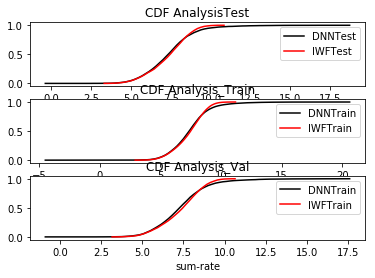

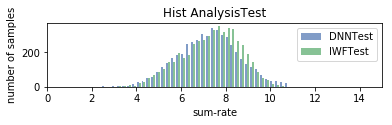

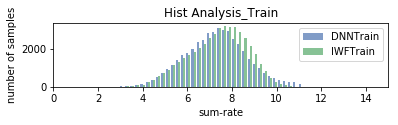

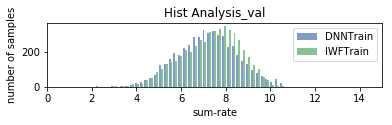

test:
Sum-rate: IWF: 7.326, DNN: 7.383
Ratio: DNN: 100.778%

Train:
Sum-rate: IWF: 7.355, DNN: 7.426
Ratio: DNN: 100.975%

Val:
Sum-rate: IWF: 7.319, DNN: 7.339
Ratio: DNN: 100.275%



0

In [40]:

trainPred=model5layers3.predict(x_train)

# encoder_x_val=encoder.predict(x_val_standard)
valPred=model5layers3.predict(x_val)

# encoder_x_test=encoder.predict(Xtest_standard)
ypred=model5layers3.predict(Xtest)
D=12
M=2
N=2
K=3
# test
xtest=DABtoComplex(Xtest,D)
ytest=DABtoComplex(Ytest,D)
ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)

# # test
nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 45000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 45000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 5000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 5000)

plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
plt.subplot(313)
plt.title('CDF Analysis_Val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(311)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
print('test:')
performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 45000)
print('Val:')
performance(IWFSRVal, nnSRVal, 5000)

# Two Hidden layers

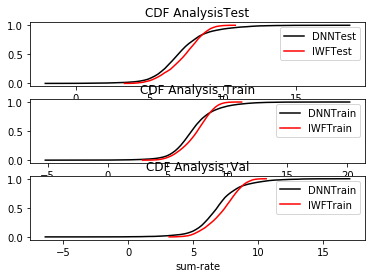

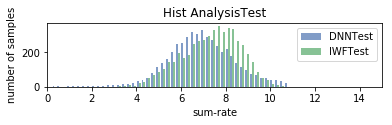

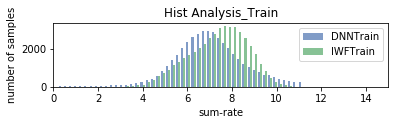

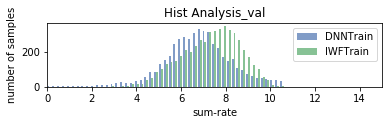

test:
Sum-rate: IWF: 7.326, DNN: 7.120
Ratio: DNN: 97.186%

Train:
Sum-rate: IWF: 7.355, DNN: 7.179
Ratio: DNN: 97.612%

Val:
Sum-rate: IWF: 7.319, DNN: 6.945
Ratio: DNN: 94.895%



0

In [41]:

trainPred=model2layers.predict(x_train)

# encoder_x_val=encoder.predict(x_val_standard)
valPred=model2layers.predict(x_val)

# encoder_x_test=encoder.predict(Xtest_standard)
ypred=model2layers.predict(Xtest)
D=12
M=2
N=2
K=3
# test
xtest=DABtoComplex(Xtest,D)
ytest=DABtoComplex(Ytest,D)
ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)

# # test
nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 45000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 45000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 5000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 5000)

plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
plt.subplot(313)
plt.title('CDF Analysis_Val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(311)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
print('test:')
performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 45000)
print('Val:')
performance(IWFSRVal, nnSRVal, 5000)